# Analis de la produccion de chatarra 2012-2023


In [146]:
import pandas as pd
serie=pd.read_csv('df_importaciones.csv')
serie

,mes,Importaciones
0,Ene_2012,119508.162327
1,Feb_2012,64675.948739
2,Mar_2012,96338.179392
3,Abr_2012,76981.341817
4,May_2012,66823.704343
...,...,...
139,Ago_2023,218072.645661
140,Sep_2023,292480.108251
141,Oct_2023,251772.943221
142,Nov_2023,222312.492484


In [147]:
import plotly.express as px
fig=px.line(serie,x='mes',y='Importaciones')
fig.show()

### Aplicando un algoritmo topologico para determinar si es una serie de tiempo ciclica o no !


In [148]:
serie1=pd.read_csv('Importaciones_final_trans.csv')
serie1
#Lo mismo que la seria solo que no tiene los meses como indice

,0
0,119508.162327
1,64675.948739
2,96338.179392
3,76981.341817
4,66823.704343
...,...
139,218072.645661
140,292480.108251
141,251772.943221
142,222312.492484


# encaje de takens

In [149]:
import matplotlib.pyplot as plt
import numpy as np

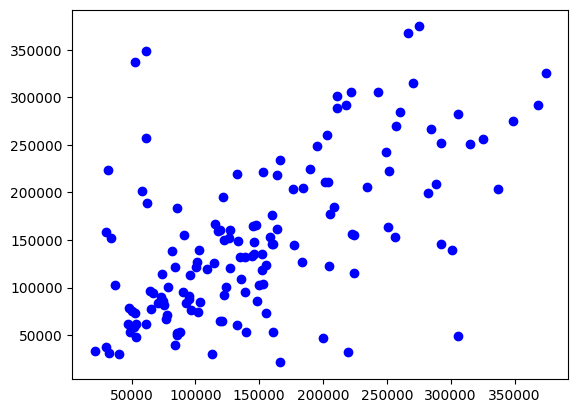

In [150]:
def embed(points,DimEmb=2):
    auxembed=[]
    for i in range(0,len(points)-DimEmb+1):
        aux=[points[i+j] for j in range(DimEmb)]
        auxembed.append(aux)
    auxembed=np.array(auxembed)
    return auxembed

embededserie=embed(np.array(serie1),DimEmb=2)
#print("Ventanas de tamaño 2 de la serie", embededserie)
plt.scatter(embededserie[:,0],embededserie[:,1],marker='o',color='blue')

### Viendolo en 3d

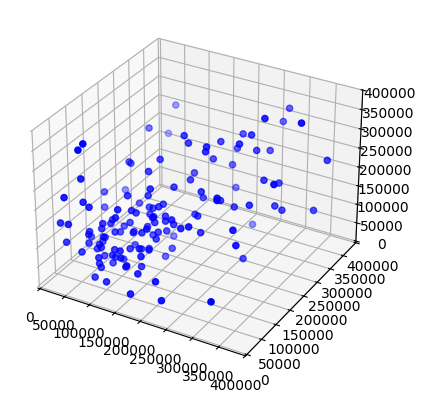

In [151]:
embededserie=embed(np.array(serie1),DimEmb=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(embededserie[:,0],embededserie[:,1],embededserie[:,2],marker='o',color='blue')
plt.show()

In [152]:
def embeding2(points,DimEmb=2,k=2):
    auxembed=[]
    for i in range(0,len(points)-(DimEmb)*k+1):
        aux=[points[i+k*j] for j in range(DimEmb)]
        auxembed.append(aux)
    auxembed=np.array(auxembed)
    return auxembed

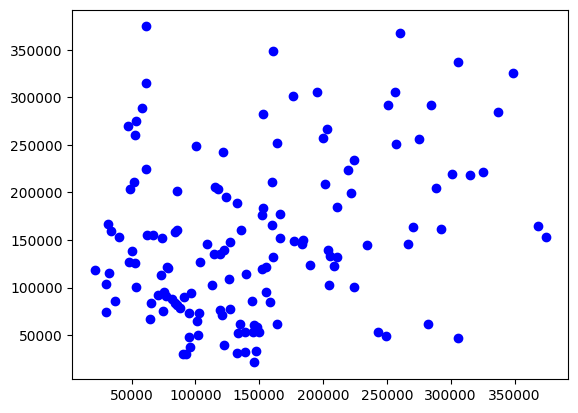

In [153]:
embedserie2=embeding2(np.array(serie1),DimEmb=2,k=3)
embedserie2
plt.scatter(embedserie2[:,0],embedserie2[:,1],marker='o',color='blue')

In [154]:
!pip install git+https://github.com/manu-mannattil/nolitsa.git

  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-17xmy3fw
  Running command git clone --filter=blob:none --quiet https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-17xmy3fw
  Resolved https://github.com/manu-mannattil/nolitsa.git to commit ccd9fab08a88fbc6ff63f0fae28730ccb74754de
  Preparing metadata (setup.py) ... done


In [155]:
# prompt: uninstall current numpy and install numpy 1.26

!pip uninstall -y numpy
!pip install numpy==1.26.0
# Restart runtime after installing/uninstalling packages to ensure changes take effect

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [156]:
!pip install giotto-tda

In [157]:
!pip install scikit-learn

In [158]:
import numpy as np
import pandas as pd
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud
import plotly.graph_objects as go
from nolitsa import dimension, delay
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [159]:
serie1['0']

,0
0,119508.162327
1,64675.948739
2,96338.179392
3,76981.341817
4,66823.704343
...,...
139,218072.645661
140,292480.108251
141,251772.943221
142,222312.492484


In [160]:
max_periodic_dimension=10
max_periodic_time_delay=10
stride=1
tau,d= takens_embedding_optimal_parameters(np.array(serie1['0']), max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  7 
Optimal dimension:  4


In [161]:
stride_3d=3 # para que tengamos una figura en 3d
embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 16
embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_serie_embedded = embedder_nonperiodic.fit_transform(serie1['0'])
print(y_serie_embedded.shape)

plot_point_cloud(y_serie_embedded)

(112, 3)


### Usando diagramas de persistencia para estudiar estos encajes

In [162]:
y_serie_embedded1 = y_serie_embedded[None, :, :]

In [163]:
from gtda.homology import VietorisRipsPersistence
# defininedo los parametros de los diagramas de persistencia
dimension_homologia=[0,1,2]
persistencia= VietorisRipsPersistence(homology_dimensions=dimension_homologia, n_jobs=2)
print('Diagrama de persistencia de la serie')
persistencia.fit_transform_plot(y_serie_embedded1)

Diagrama de persistencia de la serie


array([[[0.00000000e+00, 8.20464160e+03, 0.00000000e+00],
        [0.00000000e+00, 9.89924219e+03, 0.00000000e+00],
        [0.00000000e+00, 1.11029395e+04, 0.00000000e+00],
        [0.00000000e+00, 1.14724453e+04, 0.00000000e+00],
        [0.00000000e+00, 1.39878281e+04, 0.00000000e+00],
        [0.00000000e+00, 1.51293252e+04, 0.00000000e+00],
        [0.00000000e+00, 1.51775254e+04, 0.00000000e+00],
        [0.00000000e+00, 1.60541582e+04, 0.00000000e+00],
        [0.00000000e+00, 1.66613184e+04, 0.00000000e+00],
        [0.00000000e+00, 1.72191367e+04, 0.00000000e+00],
        [0.00000000e+00, 1.74463691e+04, 0.00000000e+00],
        [0.00000000e+00, 1.76976387e+04, 0.00000000e+00],
        [0.00000000e+00, 1.81005820e+04, 0.00000000e+00],
        [0.00000000e+00, 1.86826309e+04, 0.00000000e+00],
        [0.00000000e+00, 1.95511367e+04, 0.00000000e+00],
        [0.00000000e+00, 1.96937031e+04, 0.00000000e+00],
        [0.00000000e+00, 2.02101309e+04, 0.00000000e+00],
        [0.000

## Vemos que nos es ciclica!
##### esto lo sabemos debuido a los tipos de homologia que son mas persistentes
##### tenemos asociados varios puntos a una homologia persistente de dos dimensiones (numeros de betty)
##### Osea no es ciclica a que tenemos varios puntos en betty uno


### ¿Porque nos interesa saber si es ciclica la serie de tiempo?
### Al saber si cierto fenomeno es ciclico o no podemos elegir un enfoque especifico a la hora de precedirla
## Regresion al precio de la chatarra

## Analizando el precio de la chatarra en 3 ciudades distintas

In [164]:
ala=pd.read_csv('High_Alabama.csv')
chic=pd.read_csv('High_Chicago.csv')
mty=pd.read_csv('High_Monterrey.csv')

In [165]:
print(ala.shape,chic.shape,mty.shape)


(136, 2) (437, 2) (459, 2)


In [166]:
a=300
b=315
print((np.absolute(a-b))/300)

0.05


In [167]:
def mid(a,b):
  print((np.absolute(a-b))/a)

In [168]:
print('alabama:',2024-2013,'años repartidos en ',ala.shape[0],'observaciones')
print('chicago:',2024-1993,'años repartidos en ',chic.shape[0],'observaciones')
print('Monterrey:',2025-2016,'años repartidos en ',mty.shape[0],'observaciones')

alabama: 11 años repartidos en  136 observaciones
chicago: 31 años repartidos en  437 observaciones
Monterrey: 9 años repartidos en  459 observaciones


In [169]:
print((11/136),(31/347),(9/459))

0.08088235294117647 0.0893371757925072 0.0196078431372549


In [170]:
print(136/11,347/31,459/9)

12.363636363636363 11.193548387096774 51.0


In [171]:
fig=px.line(ala,x='Date',y='High',title='alabama')
fig.show()

In [172]:
fig=px.line(chic,x='Date',y='High',title='chicago')
fig.show()

In [173]:

fig=px.line(mty,x='Date',y='High',title='monterrey')
fig.show()

### aplicando time embedding a estas series de tiempo

### Para Alabama

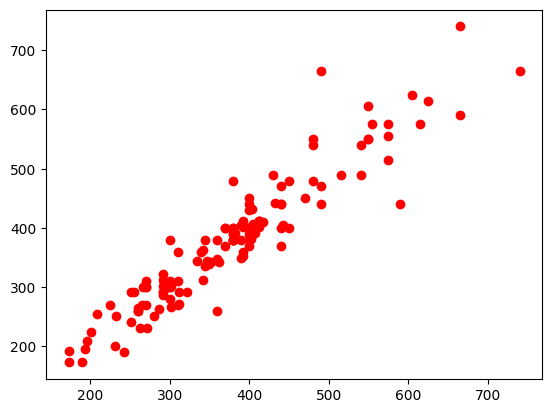

In [174]:
embeded_alabama=embed(np.array(ala['High']),DimEmb=2)
#print("Ventanas de tamaño 2 de la serie", embededserie)
plt.scatter(embeded_alabama[:,0],embeded_alabama[:,1],marker='o',color='red')

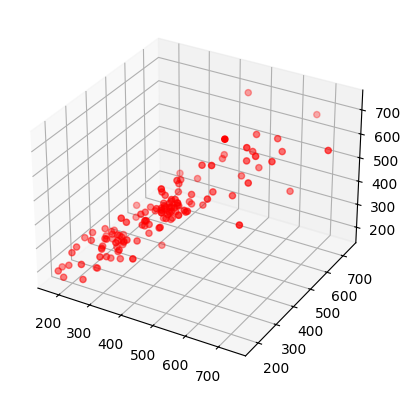

In [175]:
embeded_alabama3=embed(np.array(ala['High']),DimEmb=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(embeded_alabama3[:,0],embeded_alabama3[:,1],embeded_alabama3[:,2],marker='o',color='red')
plt.show()

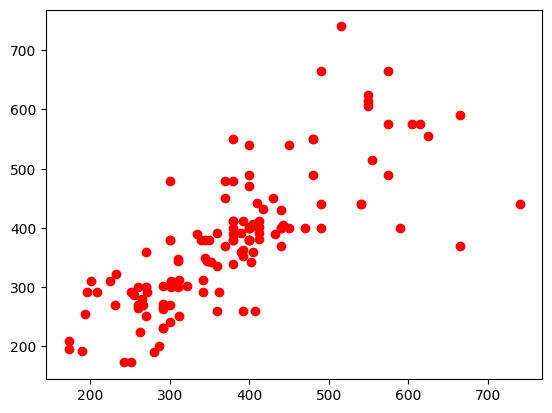

In [176]:
embed_alabama2=embeding2(np.array(ala['High']),DimEmb=2,k=3)
embedserie2
plt.scatter(embed_alabama2[:,0],embed_alabama2[:,1],marker='o',color='red')

In [177]:
max_periodic_dimension=10
max_periodic_time_delay=10
stride=1
tau,d= takens_embedding_optimal_parameters(np.array(ala['High']), max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  2 
Optimal dimension:  5


In [178]:

dim_alabama = 3
tim_alabama = 16
embedder_ala = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=tim_alabama,
    dimension=dim_alabama,
    stride=stride,
)

val_ala_embedded = embedder_ala.fit_transform(ala['High'])
print(val_ala_embedded.shape)
plot_point_cloud(val_ala_embedded)

(104, 3)


In [179]:
val_ala_embedded1 = val_ala_embedded[None, :, :]

In [180]:
persistencia_ala= VietorisRipsPersistence(homology_dimensions=[0,1,2], n_jobs=2)
print('Diagrama de persistencia de la serie de tiempo de alabama')
persistencia.fit_transform_plot(val_ala_embedded1)

Diagrama de persistencia de la serie de tiempo de alabama


array([[[  0.        ,  10.19803905,   0.        ],
        [  0.        ,  10.63014603,   0.        ],
        [  0.        ,  11.18033981,   0.        ],
        [  0.        ,  12.        ,   0.        ],
        [  0.        ,  14.14213562,   0.        ],
        [  0.        ,  14.45683193,   0.        ],
        [  0.        ,  15.62049961,   0.        ],
        [  0.        ,  16.40122032,   0.        ],
        [  0.        ,  16.73320007,   0.        ],
        [  0.        ,  19.20937347,   0.        ],
        [  0.        ,  19.8494339 ,   0.        ],
        [  0.        ,  20.61552811,   0.        ],
        [  0.        ,  22.91287804,   0.        ],
        [  0.        ,  23.85372162,   0.        ],
        [  0.        ,  24.08318901,   0.        ],
        [  0.        ,  24.49489784,   0.        ],
        [  0.        ,  25.        ,   0.        ],
        [  0.        ,  26.83281517,   0.        ],
        [  0.        ,  27.80287743,   0.        ],
        [  0

### Vemos que la serie de tiempo de los precios de venta de alabama no es ciclica


#### Analisis a la serie de tiempo de monterrey

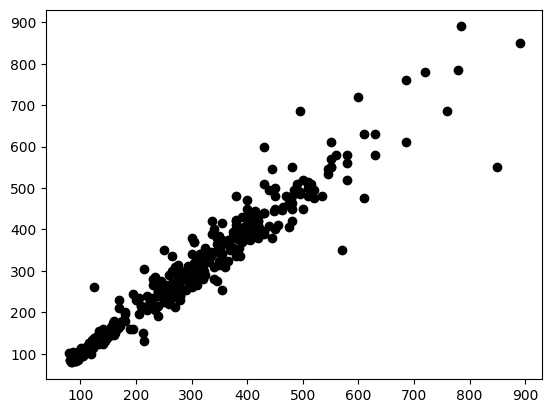

In [181]:
embeded_chicago=embed(np.array(chic['High']),DimEmb=2)
#print("Ventanas de tamaño 2 de la serie", embededserie)
plt.scatter(embeded_chicago[:,0],embeded_chicago[:,1],marker='o',color='black')

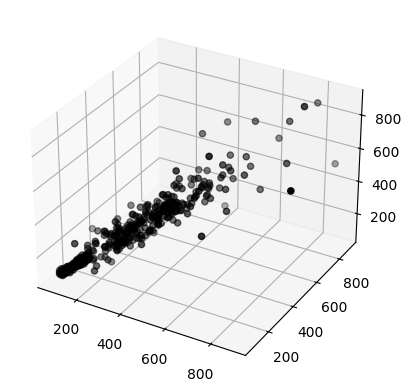

In [182]:
embeded_chicago3=embed(np.array(chic['High']),DimEmb=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(embeded_chicago3[:,0],embeded_chicago3[:,1],embeded_chicago3[:,2],marker='o',color='black')
plt.show()

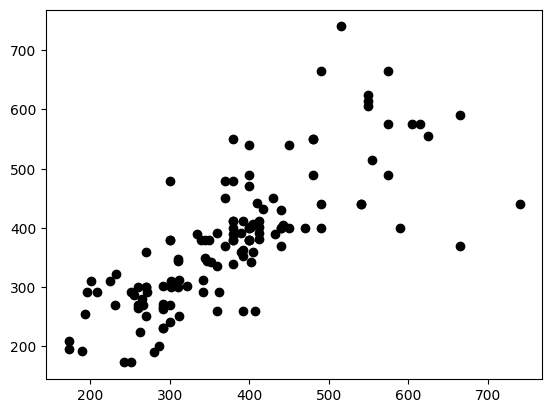

In [183]:
embed_chicago2=embeding2(np.array(chic['High']),DimEmb=2,k=3)
embedserie2
plt.scatter(embed_alabama2[:,0],embed_alabama2[:,1],marker='o',color='black')

In [184]:
max_periodic_dimension=10
max_periodic_time_delay=10

stride=1
tau,d= takens_embedding_optimal_parameters(np.array(chic['High']), max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  10 
Optimal dimension:  7


In [185]:
dim_chic = 3
tim_chic = 16
embedder_chic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=tim_chic,
    dimension=dim_chic,
    stride=stride,
)

val_chic_embedded = embedder_ala.fit_transform(chic['High'])
print(val_chic_embedded.shape)
plot_point_cloud(val_chic_embedded)

(405, 3)


In [186]:
val_chic_embedded1 = val_chic_embedded[None, :, :]

In [187]:
persistencia_chic= VietorisRipsPersistence(homology_dimensions=[0,1,2], n_jobs=2)
print('Diagrama de persistencia de la serie de tiempo de chicago')
persistencia.fit_transform_plot(val_chic_embedded1)

Diagrama de persistencia de la serie de tiempo de chicago


array([[[ 0.        ,  2.        ,  0.        ],
        [ 0.        ,  2.44948983,  0.        ],
        [ 0.        ,  2.82842708,  0.        ],
        ...,
        [62.04836655, 63.44288635,  2.        ],
        [50.48762131, 51.66236496,  2.        ],
        [43.0116272 , 47.16990662,  2.        ]]])

### Analisis para monterrey

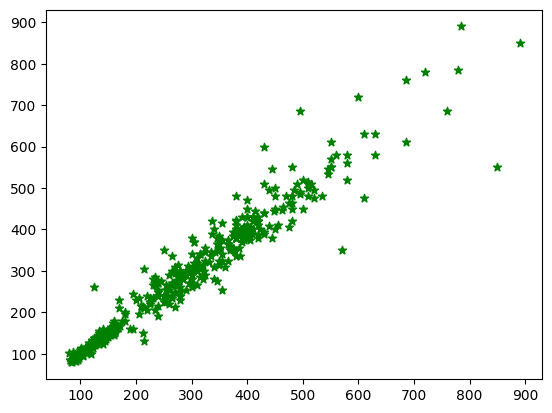

In [188]:
embeded_Monterrey=embed(np.array(chic['High']),DimEmb=2)
#print("Ventanas de tamaño 2 de la serie", embededserie)
plt.scatter(embeded_Monterrey[:,0],embeded_Monterrey[:,1],marker='*',color='green')

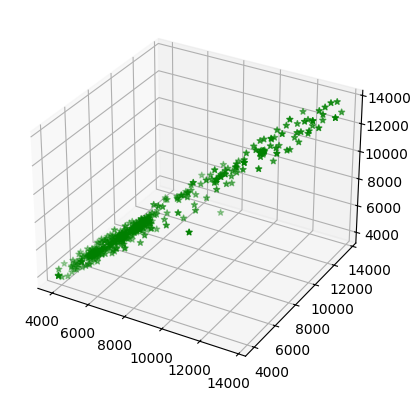

In [189]:
embeded_Monterrey3=embed(np.array(mty['High']),DimEmb=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(embeded_Monterrey3[:,0],embeded_Monterrey3[:,1],embeded_Monterrey3[:,2],marker='*',color='green')
plt.show()

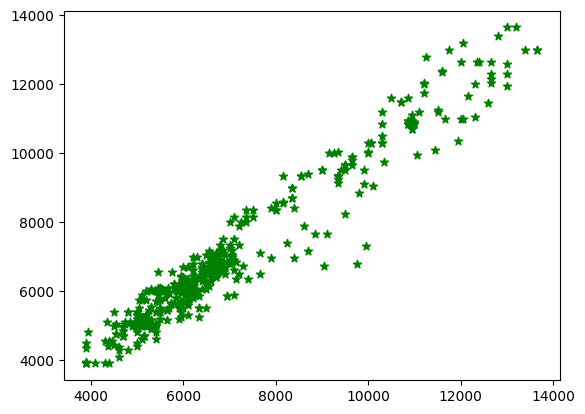

In [190]:
embed_Monterrey2=embeding2(np.array(mty['High']),DimEmb=2,k=3)

plt.scatter(embed_Monterrey2[:,0],embed_Monterrey2[:,1],marker='*',color='green')

In [191]:
max_periodic_dimension=10
max_periodic_time_delay=10

stride=1
tau,d= takens_embedding_optimal_parameters(np.array(mty['High']), max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  9 
Optimal dimension:  8


In [192]:
dim_mty = 3
tim_mty = 16
embedder_mty = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=tim_mty,
    dimension=dim_mty,
    stride=stride,
)

val_mty_embedded = embedder_ala.fit_transform(mty['High'])
print(val_mty_embedded.shape)
plot_point_cloud(val_mty_embedded)

(427, 3)


In [193]:
val_mty_embedded1 = val_mty_embedded[None, :, :]

In [194]:
persistencia_mty= VietorisRipsPersistence(homology_dimensions=[0,1,2], n_jobs=2)
print('Diagrama de persistencia de la serie de tiempo de monterrey')
persistencia.fit_transform_plot(val_mty_embedded1)

Diagrama de persistencia de la serie de tiempo de monterrey


array([[[  0.        ,  25.        ,   0.        ],
        [  0.        ,  50.        ,   0.        ],
        [  0.        ,  50.        ,   0.        ],
        ...,
        [812.78839111, 836.66003418,   2.        ],
        [531.50726318, 533.85394287,   2.        ],
        [320.15621948, 324.03704834,   2.        ]]])

### forecasting!

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Función de embedding con retardo tipo Takens
def takens_embedding_retardo(serie, dimension=4, tau=7):
    X = []
    for i in range(len(serie) - (dimension - 1) * tau):
        ventana = [serie[i + j * tau] for j in range(dimension)]
        X.append(ventana)
    return np.array(X)




# Recortar todas las series al mismo largo
min_len = min(len(mty), len(chic), len(ala), len(imp))
mty_series = mty['High'].values[-min_len:]
chic_series = chic['High'].values[-min_len:]
ala_series = ala['High'].values[-min_len:]
imp_series = serie1['0'].values[-min_len:]

# Parámetros del embedding topológico
d = 4
tau = 7

# Generar embeddings para cada serie
X_mty = takens_embedding_retardo(mty_series, d, tau)
X_chic = takens_embedding_retardo(chic_series, d, tau)
X_ala = takens_embedding_retardo(ala_series, d, tau)
X_imp = takens_embedding_retardo(imp_series, d, tau)



# Alabama

MSE: 18.87
MAE: 3.15


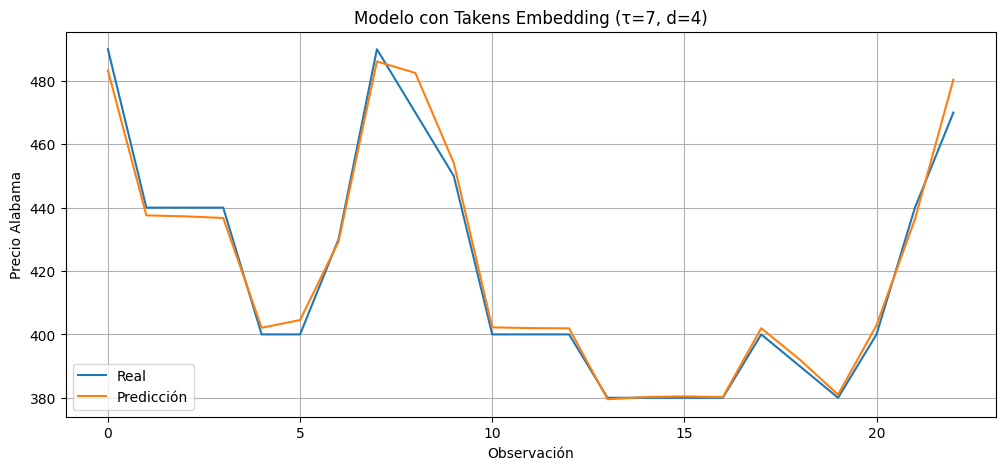

Predicción futura de precio High en alabama: 480.40


In [196]:
# Recorte sincronizado de la variable objetivo
y_a = ala_series[(d - 1) * tau:]
y_a = y_a[:X_ala.shape[0]]

# Construir la matriz total de características
X_total = np.hstack([X_ala])

# Entrenar modelo Random Forest
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_total, y_a, test_size=0.2, shuffle=False)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_a_train, y_a_train)

# Evaluación
y_a_pred = model.predict(X_a_test)
print(f"MSE: {mean_squared_error(y_a_test, y_a_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_a_test, y_a_pred):.2f}")

# Visualización de resultados
plt.figure(figsize=(12, 5))
plt.plot(y_a_test, label='Real')
plt.plot(y_a_pred, label='Predicción')
plt.title('Modelo con Takens Embedding (τ=7, d=4)')
plt.xlabel('Observación')
plt.ylabel('Precio Alabama')
plt.legend()
plt.grid(True)
plt.show()

# Predicción futura
X_futuro = np.hstack([
    [ala_series[-1 - tau * i] for i in reversed(range(d))]
]).reshape(1, -1)

pred = model.predict(X_futuro)
print(f"Predicción futura de precio High en alabama: {pred[0]:.2f}")


# Chicago

MSE: 31.20
MAE: 3.94


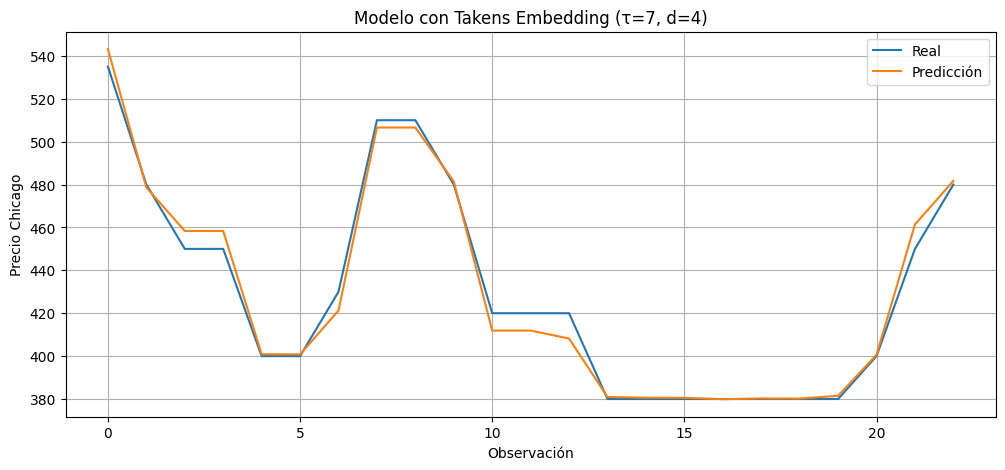

Predicción futura de precio High en chicago: 481.70


In [197]:
# Recorte sincronizado de la variable objetivo
y_c = chic_series[(d - 1) * tau:]
y_c = y_c[:X_mty.shape[0]]

# Construir la matriz total de características
X_total = np.hstack([X_chic])

# Entrenar modelo Random Forest
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_total, y_c, test_size=0.2, shuffle=False)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_c_train, y_c_train)

# Evaluación
y_c_pred = model.predict(X_c_test)
print(f"MSE: {mean_squared_error(y_c_test, y_c_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_c_test, y_c_pred):.2f}")

# Visualización de resultados
plt.figure(figsize=(12, 5))
plt.plot(y_c_test, label='Real')
plt.plot(y_c_pred, label='Predicción')
plt.title('Modelo con Takens Embedding (τ=7, d=4)')
plt.xlabel('Observación')
plt.ylabel('Precio Chicago')
plt.legend()
plt.grid(True)
plt.show()

# Predicción futura
X_futuro = np.hstack([
    [chic_series[-1 - tau * i] for i in reversed(range(d))]
]).reshape(1, -1)

pred = model.predict(X_futuro)
print(f"Predicción futura de precio High en chicago: {pred[0]:.2f}")


# Monterrey

MSE: 1244.59
MAE: 23.70


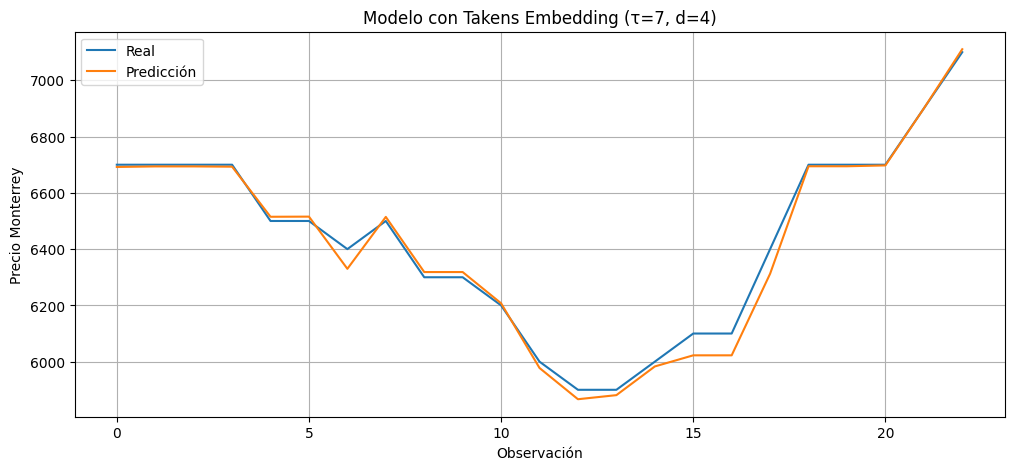

Predicción futura de precio High en Monterrey: 7110.50


In [198]:
# Recorte sincronizado de la variable objetivo
y_m = mty_series[(d - 1) * tau:]
y_m = y_m[:X_mty.shape[0]]

# Construir la matriz total de características
X_total = np.hstack([X_mty])

# Entrenar modelo Random Forest
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_total, y_m, test_size=0.2, shuffle=False)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_m_train, y_m_train)

# Evaluación
y_m_pred = model.predict(X_m_test)
print(f"MSE: {mean_squared_error(y_m_test, y_m_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_m_test, y_m_pred):.2f}")

# Visualización de resultados
plt.figure(figsize=(12, 5))
plt.plot(y_m_test, label='Real')
plt.plot(y_m_pred, label='Predicción')
plt.title('Modelo con Takens Embedding (τ=7, d=4)')
plt.xlabel('Observación')
plt.ylabel('Precio Monterrey')
plt.legend()
plt.grid(True)
plt.show()

# Predicción futura
X_futuro = np.hstack([
    [mty_series[-1 - tau * i] for i in reversed(range(d))]
]).reshape(1, -1)

pred = model.predict(X_futuro)
print(f"Predicción futura de precio High en Monterrey: {pred[0]:.2f}")


# General

MSE: 3472.42
MAE: 42.67


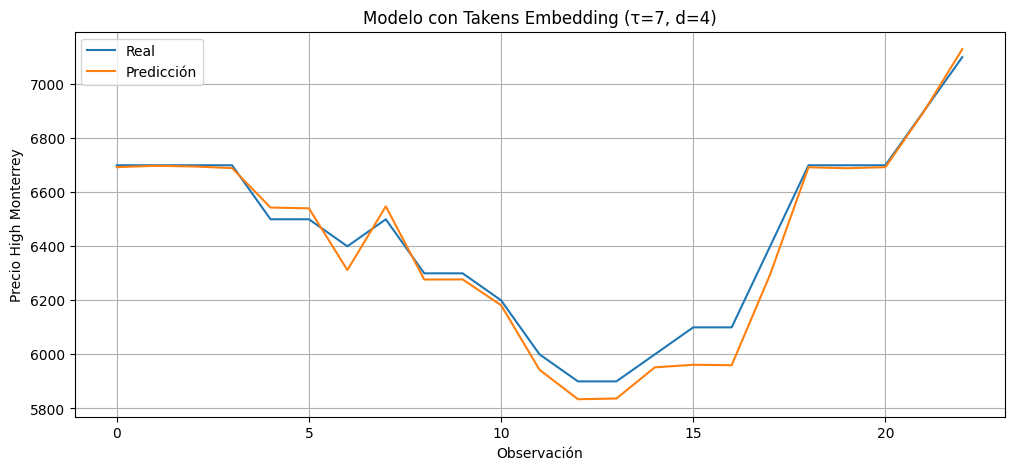

Predicción futura de precio High en Monterrey: 7129.50


In [199]:
# Recorte sincronizado de la variable objetivo
y = mty_series[(d - 1) * tau:]
y = y[:X_mty.shape[0]]

# Construir la matriz total de características
X_total = np.hstack([X_mty, X_chic, X_ala, X_imp])

# Entrenar modelo Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_total, y, test_size=0.2, shuffle=False)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

# Visualización de resultados
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Modelo con Takens Embedding (τ=7, d=4)')
plt.xlabel('Observación')
plt.ylabel('Precio High Monterrey')
plt.legend()
plt.grid(True)
plt.show()

# Predicción futura
X_futuro = np.hstack([
    [mty_series[-1 - tau * i] for i in reversed(range(d))],
    [chic_series[-1 - tau * i] for i in reversed(range(d))],
    [ala_series[-1 - tau * i] for i in reversed(range(d))],
    [imp_series[-1 - tau * i] for i in reversed(range(d))]
]).reshape(1, -1)

pred = model.predict(X_futuro)
print(f"Predicción futura de precio High en Monterrey: {pred[0]:.2f}")
